In [ ]:
import csv
import numpy as np

f = open("demographics_data_with_total_investment_feature.csv", newline='')
demo_train = open("demotrain.csv", 'w',newline='')
demo_test = open("demo_test.csv", 'w',newline='')

reader = csv.reader(f)
train_writer = csv.writer(demo_train)
test_writer = csv.writer(demo_test)

for row in reader:
    
    if row[0] == "Date":
        train_writer.writerow(row)
        test_writer.writerow(row)
    else:
        
        if np.random.rand() < .8:
            train_writer.writerow(row)
        else:
            
            test_writer.writerow(row)
demo_train.close()
demo_test.close()
f.close()
        

In [600]:

import csv

def make_one_hot_csv(f, name):
    reader = csv.reader(f)
    reader = csv.reader(x.replace('\0', '') for x in f)
    write_file = open(name, 'w',newline='')
    writer = csv.writer(write_file)
    campaigns=[]
    audiences=[]
    genders=[]
    ages=[]
    countries=[]
    labels = [ "return","total investment"]
    for row in reader:
        
        if row[3] != 'Age':
            if not row[1] in campaigns:
                campaigns.append(row[1])
                
            if not row[3] in ages:
                ages.append(row[3])
                
            if not row[4] in genders:
                genders.append(row[4])
                
            if not row[7] in countries:
                countries.append(row[7])
                
            if not row[8] in audiences:
                audiences.append(row[8])
                
    
    reader = csv.reader(x.replace('\0', '') for x in f)
    f.seek(0)
    for campaign in campaigns:
        labels.append(campaign)
    for age in ages:
        labels.append(age)
    for gender in genders:
        labels.append(gender)
    for country in countries:
        labels.append(country)
    for audience in audiences:
        labels.append(audience)
    writer.writerow(labels)
    for row in reader:
        
        if row[6] != '' and row[0]!= "Date" :
            one_hot = []
            
            one_hot.append(float(row[6]))
            one_hot.append(float(row[9]))
            for campaign in campaigns:
                if row[1] == campaign:
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for age in ages:
                if row[3] == age:
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for gender in genders:
                if row[4] == gender:
                    
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for country in countries:
                
                if row[7] == country:
                    
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            for audience in audiences:
                if row[8] == audience:
                    one_hot.append(1)
                else:
                    one_hot.append(0)
            
            writer.writerow(one_hot)
                
    write_file.close()
   
demo_train = open("demo_train.csv",newline='')
demo_test = open("demo_test.csv",newline='')
make_one_hot_csv(demo_train, "demo_one_hot_train.csv")
make_one_hot_csv(demo_test, "demo_one_hot_test.csv")

In [602]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.kernel_ridge import KernelRidge
import cvxpy as cp
from cvxpy.atoms.affine.binary_operators import MulExpression
import csv

from matplotlib import pyplot as plt

f = open("demo_one_hot_train.csv", newline='')
reader = csv.reader(f)
x_learn=[]
y_learn=[]
t_learn=[]

for row in reader:
    x_vals=[]
    if row[1] != "total investment":
        
        for val in row[2:]:
            x_vals.append(float(val))
        if float(row[0])>0:
            t_learn.append(float(row[1]))
            x_learn.append(x_vals)
            y_learn.append(np.log(float(row[0])))
    else:
        features=row[2:]
        
x_learn=np.array(x_learn)
t_learn_vec=np.array(t_learn)
t_learn=np.diag(t_learn)
y_learn=np.array(y_learn)
features=np.array(features)

f.close()

splt = np.array(range(len(y_learn)))
np.random.shuffle(splt)
    
x_train = x_learn[splt[0:int(0.8*len(y_learn))]]
t_train = np.diag(t_learn_vec[splt[0:int(0.8*len(y_learn))]])
y_train = y_learn[splt[0:int(0.8*len(y_learn))]]

x_val = x_learn[splt[int(0.8*len(y_learn)):]]
t_val = np.diag(t_learn_vec[splt[int(0.8*len(y_learn)):]])
y_val = y_learn[splt[int(0.8*len(y_learn)):]]


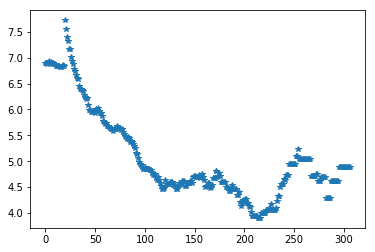

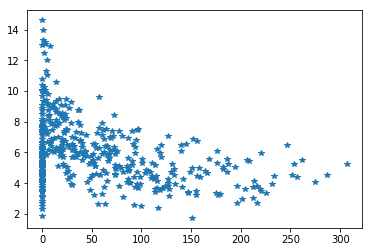

In [580]:

x_plot=[]
y_plot=[]
for i in range(1000):
    y_vals=[]
    
    for j in range(len(t_learn_vec)):
         
        if np.abs(i-t_learn_vec[j])<20:
            y_vals.append(y_learn[j])
    if len(y_vals)>1:
        x_plot.append(i)
        y_plot.append(np.mean(y_vals))

plt.plot(x_plot,y_plot,'*')
plt.show()
plt.plot(t_learn_vec,y_learn,'*')

In [603]:
#Constant
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def lin_model_MSE(t,y,w,b):
    return np.mean((np.dot(t,w)+b-y)**2)

w = cp.Variable(1)
b= cp.Variable(1)

objective = cp.Minimize(cp.sum_squares(y_train-b))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)
b=np.array(b.value)

print("Mean squared error")
print(np.mean((y_val-b)**2))

Mean squared error
1.5656925923598484


In [604]:
#LINEAR REGRESION with  total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def lin_model_MSE(t,y,w,b):
    return np.mean((np.dot(t,w)+b-y)**2)

w = cp.Variable(1)
b= cp.Variable(1)

objective = cp.Minimize(cp.sum_squares(y_train-MulExpression(np.diag(t_train),w)-b))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)
b=np.array(b.value)

print("Mean squared error")
print(lin_model_MSE(t_val,y_val,w,b))

Mean squared error
1.6063835060747058


In [605]:
#LINEAR REGRESION with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.dot(x,b)+inspt-y)**2)
n=np.shape(x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(n)
inspt = cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-MulExpression(x_train,b)-inspt))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)[:,0]
b=np.array(b.value)[:,0]
inspt = inspt.value
print("Mean squared error")
print(full_lin_model_MSE(x_val,t_val,y_val,w,b,inspt))

Mean squared error
1.4960424276604285


In [606]:

#RIDGE REGRESION with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.diag(t)*slp+np.dot(x,b)+inspt-y)**2)
n=np.shape(x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slp=cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
for i in range(100):
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                            +lam1*cp.norm(w, p=2)**2+lam2*cp.norm(b, p=2)**2)

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=full_lin_model_MSE(x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_err = err


print(best_lam1)
print(best_lam2)
print("Mean squared error")
print(best_err)


824.8295642623897
20.87869491015337
Mean squared error
1.4599566345356145


In [607]:

#ELASTIC NET with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.diag(t)*slp+np.dot(x,b)+inspt-y)**2)
n=np.shape(x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slp=cp.Variable(1)



best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                        +lam1*cp.norm(w, p=2)**2+lam2*cp.norm(b, p=2)**2+lam3*cp.norm(w, p=1)+lam4*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve(solver=cp.SCS)
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=full_lin_model_MSE(x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(best_err)


232.83572907661454
392.2336034562469
699.0156592976866
18.073887973370837
Mean squared error
1.375304277230073


In [610]:

#LASSO REGRESION with poplulations and total investment
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def full_lin_model_MSE(x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(x,w))+np.diag(t)*slp+np.dot(x,b)+inspt-y)**2)

n=np.shape(x_train)[1]
w = cp.Variable(n)
b= cp.Variable(n)
insp=cp.Variable(1)
slp=cp.Variable(1)

splt = np.array(range(len(y_learn)))
np.random.shuffle(splt)


best_err = -1
best_lam1 = 0
best_lam2 = 0
for i in range(100):
   
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    
    w = cp.Variable(n)
    b= cp.Variable(n)
    insp=cp.Variable(1)
    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                            +lam1*cp.norm(w, p=1)+lam2*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=full_lin_model_MSE(x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_err = err

print(best_lam1)
print(best_lam2)
print("Mean squared error")
print(best_err)


966.6907628760681
30.4547557882624
Mean squared error
1.307801856394364


471.47946289997674

In [611]:
w_feature_filter=np.abs(np.array(w.value)[:,0])>10**-6
b_feature_filter=np.abs(np.array(b.value)[:,0])>10**-6

w_filtered_features = [features[i] for i in range(len(features)) if w_feature_filter[i]]
b_filtered_features = [features[i] for i in range(len(features)) if b_feature_filter[i]]
print(w_feature_filter)
print(b_feature_filter)
print(w_filtered_features)
print(b_filtered_features)

[False False False False  True False False False False False False False
  True False False False False False  True False False False False False
 False  True False False False  True  True False False False False False
 False False  True  True False False  True False  True  True  True False
  True False False False False]
[False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
['US_RCH_Outdoor_LeadGen', 'female', 'GB', 'Lookalike (CA, 2%) - rainfactoryS71C', 'Lookalike (US, 2%) - rainfactoryP22C', 'Lookalike (US, 2%) - rainfactoryS71C', 'Hiking Backpacking + CF Early Tech + Non Parent *4.7M', 'Hiking Backpacking + CF Early Tech + Parent *1.4M', 'Mountain Biking + CF Early Tech + Non Parent *2.7M', 'Nature + CF Early Tech +

In [612]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#RIDGE REGRESION with poplulations and total investment filtered features
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,t,y,w,slp,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+inspt-y)**2)
n=np.shape(w_filtered_x_train)[1]

w = cp.Variable(n)

insp=cp.Variable(1)
slp = cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
for i in range(100):
    lam1 = 1000*np.random.rand()
    
    errs=[]
        

    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, w_filtered_x_train, w)-slp*np.diag(t_train)-insp)
                            +lam1*cp.norm(w, p=2))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    
    err=filtered_lin_model_MSE(w_filtered_x_val,t_val,y_val,w_ar,slp.value,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
       
        best_err = err

print(best_lam1)

print("Mean squared error")
print(best_err)
print(w_feature_filter)

980.7980120924395
Mean squared error
1.48837101125048
[False False False False  True False False False False False False False
  True False False False False False  True False False False False False
 False  True False False False  True  True False False False False False
 False False  True  True False False  True False  True  True  True False
  True False False False False]


In [613]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#ELASTIC NET  with poplulations and total investment filtereed features
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,b_x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+np.dot(b_x,b)+inspt-y)**2)
n=np.shape(w_filtered_x_learn)[1]
m=np.shape(b_filtered_x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(m)
insp=cp.Variable(1)
slp = cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
        

    objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, w_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp)
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2)+lam3*cp.norm(w, p=1)+lam4*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=filtered_lin_model_MSE(w_x_val,b_x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(best_err)


40.700696802459916
215.8779176605795
328.2147627118039
425.8126916353191
Mean squared error
1.3822410974660604


m

In [614]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]

b_filtered_x_train = x_train[:,b_feature_filter]
b_filtered_x_val = x_val[:,b_feature_filter]

#ELASTIC NET  with poplulations and total investment filtereed features huber loss
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,b_x,t,y,w,slp,b,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+np.dot(b_x,b)+inspt-y)**2)
n=np.shape(w_filtered_x_learn)[1]
m=np.shape(b_filtered_x_learn)[1]
w = cp.Variable(n)
b= cp.Variable(m)
insp=cp.Variable(1)
slp = cp.Variable(1)


best_err = -1
best_lam1 = 0
best_lam2 = 0
best_lam3 = 0
best_lam4 = 0
for i in range(100):
    
    lam1 = 1000*np.random.rand()
    lam2 = 1000*np.random.rand()
    lam3 = 1000*np.random.rand()
    lam4 = 1000*np.random.rand()
        

    objective = cp.Minimize(cp.sum_entries(cp.huber(y_train-TPW(t_train, w_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp))
                            +lam1*cp.norm(w, p=2)+lam2*cp.norm(b, p=2)+lam3*cp.norm(w, p=1)+lam4*cp.norm(b, p=1))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
    b_ar=np.array(b.value)[:,0]
    err=filtered_lin_model_MSE(w_x_val,b_x_val,t_val,y_val,w_ar,slp.value,b_ar,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        best_lam2 = lam2
        best_lam3 = lam3
        best_lam4 = lam4
        best_err = err

print(best_lam1)
print(best_lam2)
print(best_lam3)
print(best_lam4)
print("Mean squared error")
print(best_err)


63.27604657167119
280.735677513634
369.0036864651507
257.2490684398975
Mean squared error
1.4236852338731576


In [615]:
w_filtered_x_train = x_train[:,w_feature_filter]
w_filtered_x_val = x_val[:,w_feature_filter]


#RIDGE REGRESION  with poplulations and total investment filtereed features huber loss
def TPW(t,p,w):
    return MulExpression(t,MulExpression(p,w))
def filtered_lin_model_MSE(w_x,t,y,w,slp,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+inspt-y)**2)
n=np.shape(w_filtered_x_train)[1]

w = cp.Variable(n)

insp=cp.Variable(1)
slp = cp.Variable(1)




best_err = -1
best_lam1 = 0

for i in range(100):
    
    lam1 = 1000*np.random.rand()
    
        

    objective = cp.Minimize(cp.sum_entries(cp.huber(y_train-TPW(t_train, w_filtered_x_train, w)-slp*np.diag(t_train)-MulExpression(b_x_train,b)-insp))
                            +lam1*cp.norm(w, p=2))

    prob = cp.Problem(objective)
    prob.solve()
    w_ar=np.array(w.value)[:,0]
   
    err=filtered_lin_model_MSE(w_filtered_x_val,t_val,y_val,w_ar,slp.value,insp.value)
    
    if err < best_err or best_err < 0:
        best_lam1 = lam1
        
        best_err = err

print(best_lam1)

print("Mean squared error")
print(best_err)


1.0867101272697965
Mean squared error
8.939687856023639


In [618]:
def filtered_lin_model_MSE(w_x,t,y,w,slp,inspt):
    return np.mean((np.dot(t,np.dot(w_x,w))+np.diag(t)*slp+inspt-y)**2)

#The model with the best validation error was the filtered ridge regresion
w_fltr=[ True, False, False, False,  True, False,  True, False, False,  True,  True, False,
 False,  True, False, False, False, False, False, False, False,  True, False, False,
 False,  True, False,  True, False,  True,  True, False, False,  True, False, False,
 False, False,  True,  True,  True,  True, False, False,  True,  True, False, False,
  True,  True, False,  True, False]



print(w_x_train)
print(filtered_features)
n=np.shape(x_train)[1]

w = cp.Variable(n)
b = cp.Variable(n)
slp = cp.Variable(1)
insp = cp.Variable(1)

lam1=966.6907628760681
lam2=30.4547557882624


insp=cp.Variable(1)
slp = cp.Variable(1)
objective = cp.Minimize(cp.sum_squares(y_train-TPW(t_train, x_train, w)-slp*np.diag(t_train)-MulExpression(x_train,b)-insp)
                            +lam1*cp.norm(w, p=1)+lam2*cp.norm(b, p=1))

prob = cp.Problem(objective)
prob.solve()
w=np.array(w.value)[:,0]
b=np.array(b.value)[:,0]
slp=slp.value
insp=insp.value
err=full_lin_model_MSE(x_val,t_val,y_val,w,slp,b,insp)
print(err)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.3078018545888097


In [619]:
demo_train = open("demo_train.csv", 'r',newline='')
demo_test = open("demo_test.csv", 'r',newline='')
demo_one_hot_train =open("demo_one_hot_train.csv", 'r',newline='')
demo_one_hot_test=open("demo_one_hot_test.csv", 'r',newline='')

corrected_demo_train = open("corrected_demographics_train.csv", 'w',newline='')
corrected_demo_test = open("corrected_demographics_test.csv", 'w',newline='')

reader = csv.reader(demo_train)
one_hot_reader = csv.reader(demo_one_hot_train)
writer = csv.writer(corrected_demo_train)

for row, one_hot_row in zip(reader, one_hot_reader):
    x=[]
    
    if row[0] != "Date":
        for val in one_hot_row[2:]:
            x.append(float(val))
        x=np.array(x)
        t=float(one_hot_row[1])
        row_to_write=row.copy()
        
        row_to_write[6]=float(row[6])/(np.exp(t*(np.dot(x,w)+slp)+insp))
        row_to_write.append(np.exp(t*(np.dot(x,w)+slp)+insp))
        writer.writerow(row_to_write)
    else:
        row.append("corection factor")
        writer.writerow(row)
demo_train.close()
corrected_demo_train.close()
demo_one_hot_train.close()

reader = csv.reader(demo_test)
one_hot_reader = csv.reader(demo_one_hot_test)
writer = csv.writer(corrected_demo_test)

for row, one_hot_row in zip(reader, one_hot_reader):
    x=[]
    if row[0] != "Date":
        for val in one_hot_row[2:]:
            x.append(float(val))
        x=np.array(x)
        t=float(one_hot_row[1])
        row_to_write=row.copy()
        
        row_to_write[6]=float(row[6])/(np.exp(t*(np.dot(x,w)+slp)+insp))
        row_to_write.append(np.exp(t*(np.dot(x,w)+slp)+insp))
        writer.writerow(row_to_write)
    else:
        row.append("corection factor")
        writer.writerow(row)
demo_test.close()
corrected_demo_test.close()
demo_one_hot_test.close()

In [536]:
np.dot(x,w)

array([0.])

In [473]:
best_lam1

497.2920342199895